In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

numpy_time_list = []
listas_time_list = []
torch_time_list = []

In [366]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
        #print("X: ", X[:2])
        #print("Y: ", Y[:2])
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            #print("delta_W: ",delta_W)
            #print("delta_b: ",delta_b)
            self.descent(delta_W, delta_b, learning_rate)      
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [367]:
df = pd.read_csv("https://raw.githubusercontent.com/SLPeoples/Machine-Learning-A-Z/master/Part%2003%20-%20Classification/16_SVM/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [368]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

[0.15523802] 2.7860044190847216e-17
(180,) (180, 1)


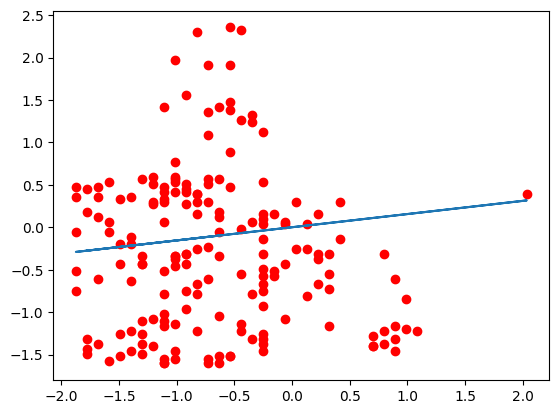

In [369]:
reg = LinearRegression(n_features=1)

start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy = end_time - start_time
numpy_time_list.append(time_taken_numpy)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [370]:
def foo(w, b, n):
    x = np.random.rand(n,1)
    y = np.power(2, (w*x)) + b
    return x, y

x, y = foo(9, 3, 25000)
x.shape, y.shape

((25000, 1), (25000, 1))

[333.78428538] -82.13569803632092
(180, 1) (180, 1)


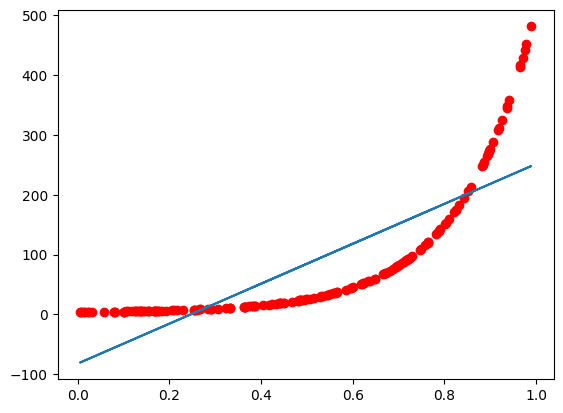

In [371]:
reg = LinearRegression(n_features=1)
params = reg.train(x, y, epochs=500, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [372]:
import torch

In [373]:
class LinearRegression_Pytorch:

    def __init__(self, n_features):
        self.W = torch.randn(n_features, 1, dtype=torch.double, requires_grad=True)
        self.b = torch.randn(1, dtype=torch.double, requires_grad=True)

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W.data -= learning_rate*delta_W.data
        self.b.data -= learning_rate*delta_b.data 

    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()) * X.double(), dim=0) * 2 / X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()), dim=0) * 2 / X.shape[0]
        return delta_W, delta_b
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.tensor(X, dtype=torch.double).reshape(-1, 1)
        Y = torch.tensor(Y, dtype=torch.double).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)



        return self.W.detach().numpy(), self.b.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X).reshape(-1, 1)
        product = torch.matmul(X, self.W) + self.b
        return product.detach().numpy()

In [374]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

reg2 = LinearRegression_Pytorch(n_features=1)

[0.15523802] 1.4853442946366645e-17


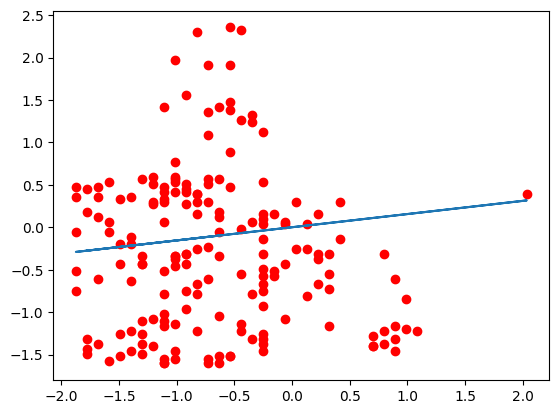

In [375]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch = end_time - start_time
torch_time_list.append(time_taken_torch)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [376]:
import random

class LinearRegression_listas:

    def __init__(self, n_features):
        self.W = [[random.gauss(-1, 1)] for i in range(n_features)] #weights
        b = random.random()
        self.b = [b] #intercept
        #self.W= [[-0.16117313]]
        #self.b =[0.19441798]
        print("self.W: ",self.W)
        print("self.b: ",self.b)
        #self.W = np.random.normal(-1,1,(n_features,1)) #weights
        #self.b = np.random.rand(1) #intercept

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W = [[w-learning_rate*delta_W for w in row] for row in W]
        self.b = [b-learning_rate*delta_b for b in self.b]


    def my_matmul(self, a, b):
        m = len(a)                  #Obtener filas de a
        n = len(a[0])               #Obtener columnas de a
        m2 = len(b)                 #Obtener filas de b
        n2 = len(b[0])              #Obtener columnas de b
        #Verificar que las dimensiones sean correctas 
        if n != m2:                 
            raise ValueError("Input shapes not compatible for matrix multiplication")
        #Inicializar matriz de resultado
        c = arr = [[0 for j in range(n2)] for i in range(m)] 
        # Multiplicacion de matrices
        for i in range(m):
            for j in range(n2):
                dot_product = 0
                for k in range(n):
                    dot_product += a[i][k] * b[k][j]
                c[i][j] = dot_product
        return c    
    
    def my_sum(self, x):
        total = 0
        for i in range(len(x)):
            for j in range(len(x[0])):
                total += x[i][j]
        return total

    def my_multiply(self, a, b):
        m = len(a)   
        n = len(a[0])
        m2 = len(b)   
        n2 = len(b[0])
        #Validacion
        if m != m2 or n != n2:
            raise ValueError("Input arrays must have the same shape")
        #Inicializar matriz de resultado
        c = arr = [[0 for j in range(n)] for i in range(m)] 
        #Multiplicacion
        for i in range(m):
            for j in range(n):
                c[i][j] = a[i][j] * b[i][j]
        return c
    
    def my_sub(self, a, b):
        c = []
        for i in range(len(a)):
            row = []
            for j in range(len(a[0])):
                row.append(a[i][j] - b[i][j])
            c.append(row)
        return c


    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        #print("X: ", X)
        #print("W: ", self.W)
        tmp0 = (self.my_matmul(X,self.W))
        for i in range(len(tmp0)):
            tmp0[i][0] += self.b[0]
        #print("tmp0: ", tmp0)
        #print("Y: ", Y)
        tmp = self.my_sub(tmp0, Y)
        tmp1 = self.my_multiply(tmp, X)
        delta_W = self.my_sum(tmp1)*2/len(X) 
        #partial derivative of cost w.r.t the intercept
        delta_b = self.my_sum(tmp)*2/len(X)                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        #X = np.array(X).reshape(-1,1)
        #Y = np.array(Y).reshape(-1,1)
        X = [[x] for x in X]
        Y = [[y] for y in Y]
        #print("X: ", X[:2])
        #print("Y: ", Y[:2])

        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            #print("delta_W: ",delta_W)
            #print("delta_b: ",delta_b)
            self.descent(delta_W, delta_b, learning_rate)
            
        return self.W, self.b

    def predict(self, X):
        X = [[x] for x in X]
        print(len(X[0]), len(X))
        product = self.my_matmul(X,self.W)+self.b
        return product

In [377]:
# feature engineering?
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

self.W:  [[-1.754668588954777]]
self.b:  [0.34559267617652834]
[0.31724863524237357] 3.9258144817815036e-17
1 180


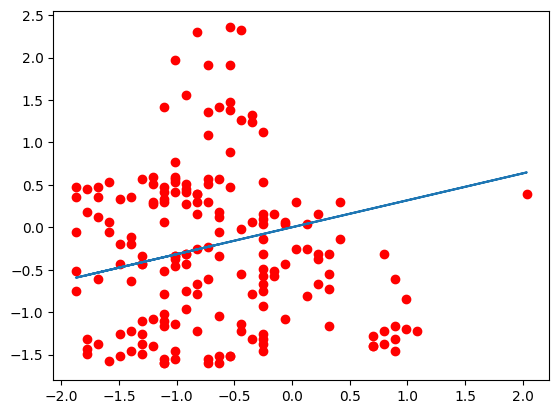

In [378]:
reg3 = LinearRegression_listas(n_features=1)

start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas = end_time - start_time
listas_time_list.append(time_taken_listas)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [379]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head(10)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [380]:
# feature engineering?
x = (df['Height']-df['Height'].mean())/df['Height'].std() #standardization of the dataset
y = (df["Weight"]-df['Weight'].mean())/df["Weight"].std()
x.shape, y.shape

((10000,), (10000,))

[0.9247563] 2.921077485138208e-16
(180,) (180, 1)


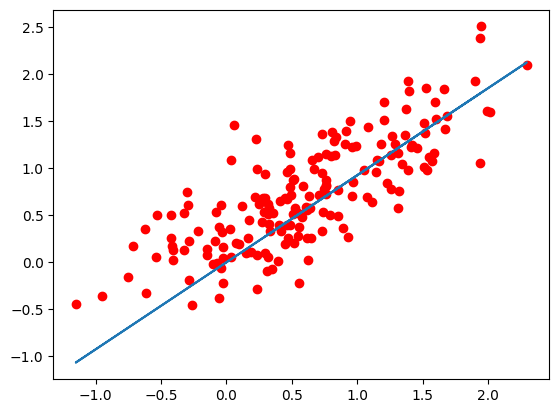

In [381]:
start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy2 = end_time - start_time
numpy_time_list.append(time_taken_numpy2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.9247563] 2.9958568073383435e-16


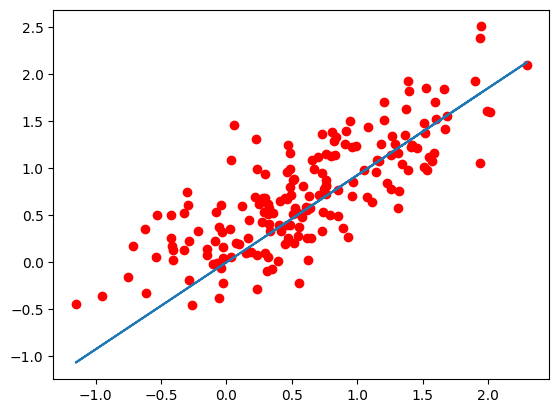

In [382]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch2 = end_time - start_time
torch_time_list.append(time_taken_torch2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.5559275091085835] 6.876694694508226e-16
1 180


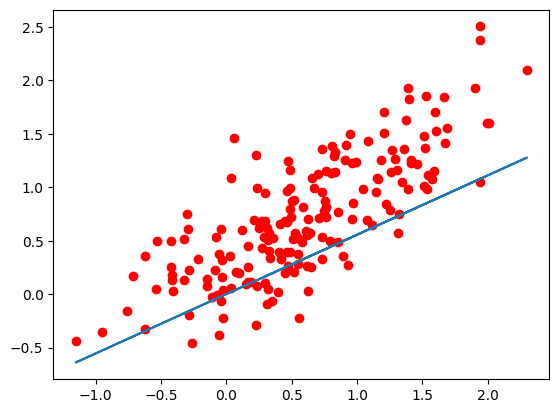

In [383]:
start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas2 = end_time - start_time
listas_time_list.append(time_taken_listas2)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [384]:
df = pd.read_csv("data_vuelos.csv")
df.head(10)


,Country,Vuelos,Muertes
0,Estados Unidos,46095,8
1,Panama,46097,15
2,Costa Rica,18079,119
3,España,18081,664
4,Rusia,26101,109
5,Italia,26099,4626
6,Francia,26097,40
7,Alemania,26095,25
8,Argentina,26093,546
9,Suiza,26091,373


In [385]:
# feature engineering?
x = (df['Vuelos']-df['Vuelos'].mean())/df['Vuelos'].std() #standardization of the dataset
y = (df["Muertes"]-df['Muertes'].mean())/df["Muertes"].std()
x.shape, y.shape

((16,), (16,))

[-0.2188052] 1.7327549919094543e-17
(16,) (16, 1)


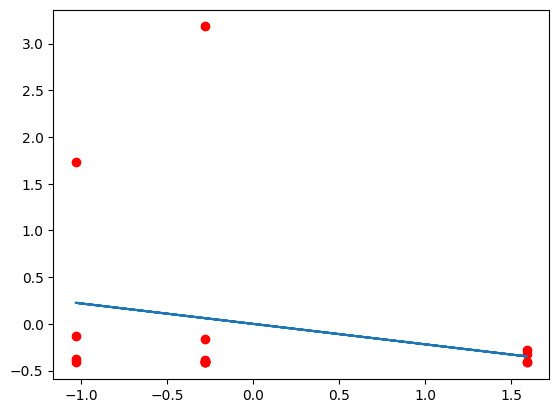

In [386]:
start_time = time.time()
params = reg.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_numpy3 = end_time - start_time
numpy_time_list.append(time_taken_numpy3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[-0.2188052] 2.48054821391081e-17


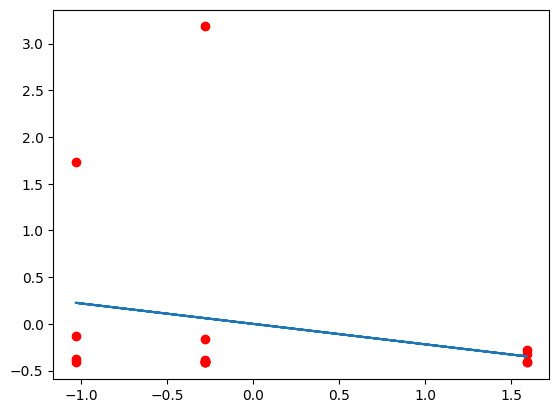

In [387]:
start_time = time.time()
params = reg2.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_torch3 = end_time - start_time
torch_time_list.append(time_taken_torch3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg2.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

[0.2093452013656848] -1.8016040576542492e-17
1 16


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (17,) + inhomogeneous part.

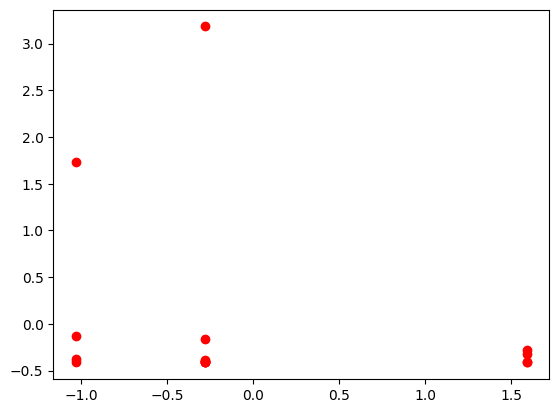

In [388]:
start_time = time.time()
params = reg3.train(x, y, epochs=200, learning_rate=0.225)
end_time = time.time()
time_taken_listas3 = end_time - start_time
listas_time_list.append(time_taken_listas3)

print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg3.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [389]:
print(numpy_time_list)
print(listas_time_list)
print(torch_time_list)

[0.008682727813720703, 0.025107145309448242, 0.008021831512451172]
[0.24278998374938965, 12.595624446868896, 0.010134696960449219]
[0.028105735778808594, 0.052701473236083984, 0.02465963363647461]


In [390]:
k_values = [1,2,3]
time_data = {
  "Numpy Implementation": numpy_time_list,
  "Lista Implementation": listas_time_list,
  "Torch Implementation": torch_time_list
}
pd.DataFrame(time_data, index = k_values)

,Numpy Implementation,Lista Implementation,Torch Implementation
1,0.008683,0.242790,0.028106
2,0.025107,12.595624,0.052701
3,0.008022,0.010135,0.024660
